1 División train/test
2 Análisis exploratorio:
    Head, describe, dtypes, etc
    Outliers
    Correlación
3 Preprocesamiento:
    Eliminación de variables, mediante selección (random forest/Lasso), alta correlación, alto porcentaje de missings, lo que sea
    Generación de variables
4 Modelado:
    Cross validation
    Evaluación, mejor si lo hacéis de más de un modelo
5 Conclusión (escrita, no numérica; un par de líneas tops)

# GRAN PRÁCTICA GRAN #

<div class="alert alert-success">
    <center>
<b> Importamos librerías</b> 
    </center>
</div>

In [1]:
import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt # para dibujar

<div class="alert alert-success">
    <center>
<b> Carga de datos</b> 
    </center>
</div>

In [2]:
airbnb_data = pd.read_csv("./data/airbnb-listings-extract.csv",sep=";", decimal=".")
airbnb_data.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


<div class="alert alert-success">
    <center>
<b> Desde ya puedo decir que voy a eliminar la URL, el ScapeID (metadato), summary, space, description, N. overview, license, jurisdiction names, reviews/month, y varias otras</b> 
    </center>
</div>

In [3]:
airbnb_data.dtypes

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
                                   ...   
Cancellation Policy                object
Calculated host listings count    float64
Reviews per Month                 float64
Geolocation                        object
Features                           object
Length: 89, dtype: object

In [4]:
airbnb_data.describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.478000e+04,1.478000e+04,1.478000e+04,12881.000000,14777.000000,14777.000000,14780.000000,14780.000000,14780.000000,14725.000000,...,14780.000000,11476.000000,11454.000000,11460.000000,11443.000000,11460.000000,11440.000000,11439.000000,14776.000000,11618.000000
mean,1.028089e+07,2.017037e+13,3.608080e+07,94.823461,12.513636,12.513636,40.497626,-3.858041,3.277808,1.281732,...,22.632273,91.697978,9.416012,9.328883,9.621778,9.647033,9.532168,9.218201,9.486871,1.870014
std,5.564829e+06,5.667971e+08,3.425360e+07,15.215988,34.090223,34.090223,4.641387,14.123146,2.097291,0.658517,...,38.290244,8.989101,0.921938,0.989933,0.802736,0.767116,0.774527,0.950578,23.626014,1.867550
min,1.862800e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,-37.851182,-123.131344,1.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.554732e+06,2.017041e+13,6.787360e+06,100.000000,1.000000,1.000000,40.409726,-3.707604,2.000000,1.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.133492e+07,2.017041e+13,2.464875e+07,100.000000,2.000000,2.000000,40.419466,-3.700785,3.000000,1.000000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.200000
75%,1.532631e+07,2.017041e+13,5.432919e+07,100.000000,6.000000,6.000000,40.430916,-3.684057,4.000000,1.000000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,1.910969e+07,2.017062e+13,1.247534e+08,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,...,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


In [5]:
airbnb_data.columns


Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

<div class="alert alert-success">
    <center>
<b> Procedo a dividir entre train y test</b> 
    </center>
</div>

In [6]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(airbnb_data, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

airbnb_data_train = pd.read_csv('./train.csv', sep=';', decimal='.')
airbnb_data_test = pd.read_csv('./test.csv', sep=';', decimal='.')


Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


<div class="alert alert-success">
    <center>
<b> Me cago en satán, esto tiene muchísimas columnas</b> 
    </center>
</div>

<div class="alert alert-warning">
    <center>
<b> ATENCIÓN: Para facilitar la correción, aclaro lo siguiente: de aquí en adelante estoy nombrando al training set como "airbnb_data_clean". Esto es así porque avancé de esta forma y luego me dí cuenta de que había que separar los datasets antes de hacer cualquier cosa... así que para no cambiar todo lo dejé como está</b> 
    </center>
</div>

In [7]:
airbnb_data_clean = airbnb_data_train.drop(["ID","Listing Url", "Scrape ID","Name","Summary","Space","Description","Experiences Offered",
                                      "Neighborhood Overview","Notes","Transit","Access","Interaction","House Rules",
                                      "Thumbnail Url","Medium Url","Picture Url","XL Picture Url","Host ID","Host URL",
                                      "Host Name", "Host Since",
"Host Location",
"Host About",
"Host Response Time",
"Host Response Rate",
"Host Acceptance Rate",
"Host Thumbnail Url",
"Host Picture Url",
"Host Neighbourhood",
"Host Listings Count",
"Host Total Listings Count",
"Host Verifications",
"Street",
"Neighbourhood Cleansed",
"Neighbourhood Group Cleansed",
"Market",
"Smart Location",
"Country Code",
"Weekly Price",
"Monthly Price",
"Security Deposit",
"Cleaning Fee",
"Guests Included",
"Extra People",
"Minimum Nights",
"Maximum Nights",
"Calendar Updated",
"Has Availability",
"Availability 30",
"Availability 60",
"Availability 90",
"Availability 365",
"Calendar last Scraped",
"First Review",
"Last Review",
"Review Scores Accuracy",
"Review Scores Cleanliness",
"Review Scores Checkin",
"Review Scores Communication",
"Review Scores Location",
"Review Scores Value",
"License",
"Jurisdiction Names",
"Cancellation Policy",
"Calculated host listings count",
"Reviews per Month",
"Geolocation",
"Features",
"Amenities",
"Last Scraped",
"State",
"Zipcode", "Square Feet", "City", "Country", "Neighbourhood", "Property Type"], axis=1)
airbnb_data_clean.head()


,Latitude,Longitude,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Number of Reviews,Review Scores Rating
0,40.407732,-3.684819,Entire home/apt,4,1.0,1.0,2.0,Real Bed,60.0,12,95.0
1,40.415802,-3.705340,Entire home/apt,4,1.0,1.0,2.0,Real Bed,50.0,20,91.0
2,40.389048,-3.740374,Shared room,1,1.5,1.0,8.0,Real Bed,10.0,0,NaN
3,40.412814,-3.703052,Private room,2,3.0,1.0,1.0,Real Bed,30.0,0,NaN
4,40.438631,-3.713716,Private room,2,1.0,1.0,1.0,Real Bed,32.0,97,92.0


<div class="alert alert-success">
    <center>
<b> La mayoría de estas columnas no aportarán nada para predecir el precio (por ejemplo, todas las que contengan URLs). Algunas las elimino porque según mi criterio no aportarán tanto, como "last review" o "guests included".  <br><br>Mi lógica es que, en un principio, mientras menos variables, mejor. De esta forma simplifico el modelo y disminuyo los tiempos de procesamiento. Una vez armada la estructura, puedo ir devolviendo alguna que otra columna para evaluar su impacto en el modelo.</b> 
    </center>
</div>

In [8]:
airbnb_data_clean.head().T

,0,1,2,3,4
Latitude,40.407732,40.415802,40.389048,40.412814,40.438631
Longitude,-3.684819,-3.70534,-3.740374,-3.703052,-3.713716
Room Type,Entire home/apt,Entire home/apt,Shared room,Private room,Private room
Accommodates,4,4,1,2,2
Bathrooms,1.0,1.0,1.5,3.0,1.0
Bedrooms,1.0,1.0,1.0,1.0,1.0
Beds,2.0,2.0,8.0,1.0,1.0
Bed Type,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed
Price,60.0,50.0,10.0,30.0,32.0
Number of Reviews,12,20,0,0,97


In [9]:
airbnb_data_clean.columns

Index(['Latitude', 'Longitude', 'Room Type', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Beds', 'Bed Type', 'Price', 'Number of Reviews',
       'Review Scores Rating'],
      dtype='object')

<div class="alert alert-success">
    <center>
<b> Codifico las variables Room type y Bed Type</b> 
    </center>
</div>

In [10]:
categorical = ['Room Type', 'Bed Type']

mean_map = {}
for c in categorical:
    mean = airbnb_data_clean.groupby(c)['Price'].mean()
    airbnb_data_clean[c] = airbnb_data_clean[c].map(mean)    
    mean_map[c] = mean

# Si hubiera test, luego se haría:
#for c in categorical:
#    data_test[c] = data_test[c].map(mean_map[c])

airbnb_data_clean.head()

,Latitude,Longitude,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Number of Reviews,Review Scores Rating
0,40.407732,-3.684819,95.101560,4,1.0,1.0,2.0,74.080606,60.0,12,95.0
1,40.415802,-3.705340,95.101560,4,1.0,1.0,2.0,74.080606,50.0,20,91.0
2,40.389048,-3.740374,31.320988,1,1.5,1.0,8.0,74.080606,10.0,0,NaN
3,40.412814,-3.703052,40.894831,2,3.0,1.0,1.0,74.080606,30.0,0,NaN
4,40.438631,-3.713716,40.894831,2,1.0,1.0,1.0,74.080606,32.0,97,92.0


<div class="alert alert-success">
    <center>
<b> Esto lo hice en un principio hasta que ví que convenía eliminar la columna "Sq Feet". Ya no es necesario</b> 
    </center>
</div>

In [11]:
# airbnb_data_clean["Square Feet"] = airbnb_data_clean["Square Feet"].apply(lambda x: x * 0.3048 * 0.3048)
# ya lo hice una vez y si ejecuto de nuevo me tira error porque no encuentra la columna
# airbnb_data_clean.columns = ['Neighbourhood', 'City', 'Country', 'Latitude',
#        'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms',
#        'Bedrooms', 'Beds', 'Bed Type', 'Square Meters', 'Price',
#        'Number of Reviews', 'Review Scores Rating']

In [12]:
airbnb_data_clean.describe()

,Latitude,Longitude,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Number of Reviews,Review Scores Rating
count,11824.000000,11824.000000,11824.000000,11824.000000,11780.000000,11804.00000,11787.000000,11824.000000,11809.000000,11824.000000,9163.000000
mean,40.491628,-3.776863,73.730557,3.277486,1.285229,1.34429,2.049122,73.713059,73.712592,22.664834,91.628179
std,4.701030,14.014695,26.648801,2.093973,0.664691,0.90518,1.623489,2.711387,71.624844,38.092338,9.137614
min,-37.851182,-123.124429,31.320988,1.000000,0.000000,0.00000,1.000000,43.222222,9.000000,0.000000,20.000000
25%,40.409758,-3.707538,40.894831,2.000000,1.000000,1.00000,1.000000,74.080606,34.000000,1.000000,89.000000
50%,40.419331,-3.700763,95.101560,3.000000,1.000000,1.00000,2.000000,74.080606,55.000000,7.000000,94.000000
75%,40.430778,-3.683917,95.101560,4.000000,1.000000,2.00000,2.000000,74.080606,87.000000,27.000000,98.000000
max,55.966912,153.371427,95.101560,16.000000,8.000000,10.00000,16.000000,79.411765,969.000000,356.000000,100.000000


<div class="alert alert-success">
    <center>
<b> Grafico un par de valores</b> 
    </center>
</div>

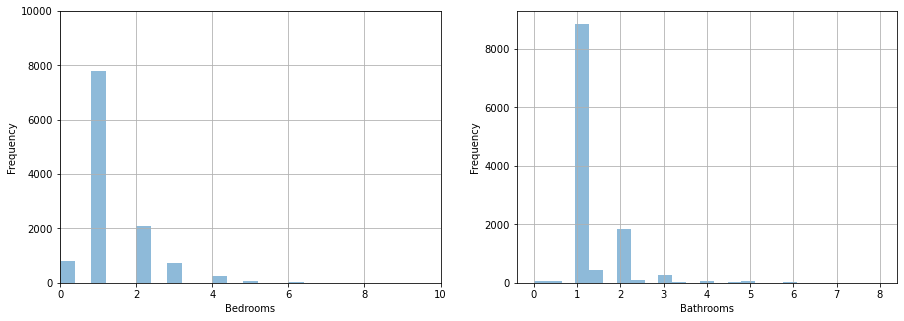

In [13]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
airbnb_data_clean['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.axis([0, 10, 0, 10000])
plt.xlabel('Bedrooms')

# plt.subplot(1,3,2)
# airbnb_data_clean['Square Meters'].plot.hist(alpha=0.5, bins=25, grid = True)
# plt.xlabel('Sq. Meters')

plt.subplot(1,2,2)
airbnb_data_clean['Bathrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Bathrooms')

plt.show()

<div class="alert alert-success">
    <center>
<b> Algunas entradas con 0 metros cuadrados y/o 0 habitaciones (esto último técnicamente puede ser)</b> 
    </center>
</div>

<div class="alert alert-success">
    <center>
<b> Hagamos una correlación entre todo a ver qué hay</b> 
    </center>
</div>

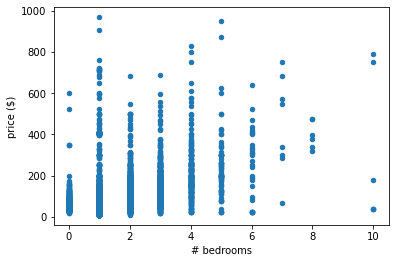

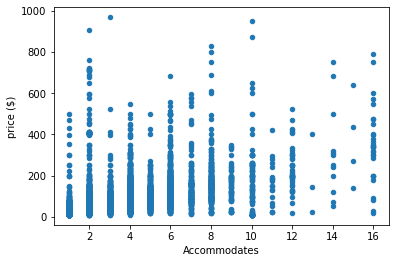

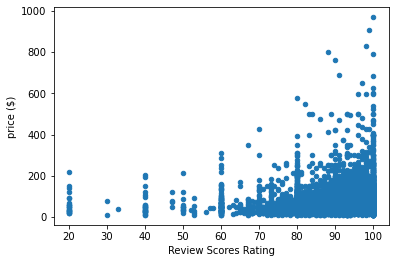

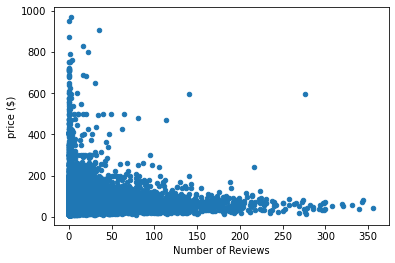

In [14]:
airbnb_data_clean.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('# bedrooms')
plt.ylabel('price ($)')
plt.show()

airbnb_data_clean.plot(kind = 'scatter',x='Accommodates',y = 'Price')
plt.xlabel('Accommodates')
plt.ylabel('price ($)')
plt.show()

airbnb_data_clean.plot(kind = 'scatter',x='Review Scores Rating',y = 'Price')
plt.xlabel('Review Scores Rating')
plt.ylabel('price ($)')

airbnb_data_clean.plot(kind = 'scatter',x='Number of Reviews',y = 'Price')
plt.xlabel('Number of Reviews')
plt.ylabel('price ($)')

plt.show()

<div class="alert alert-success">
    <center>
<b> Me interesa la variable "Review Scores Rating". Podríamos extraer la relación entre el puntaje y el precio</b> 
    </center>
</div>

C:\Users\zegal\AppData\Local\Temp/ipykernel_11076/2742298373.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


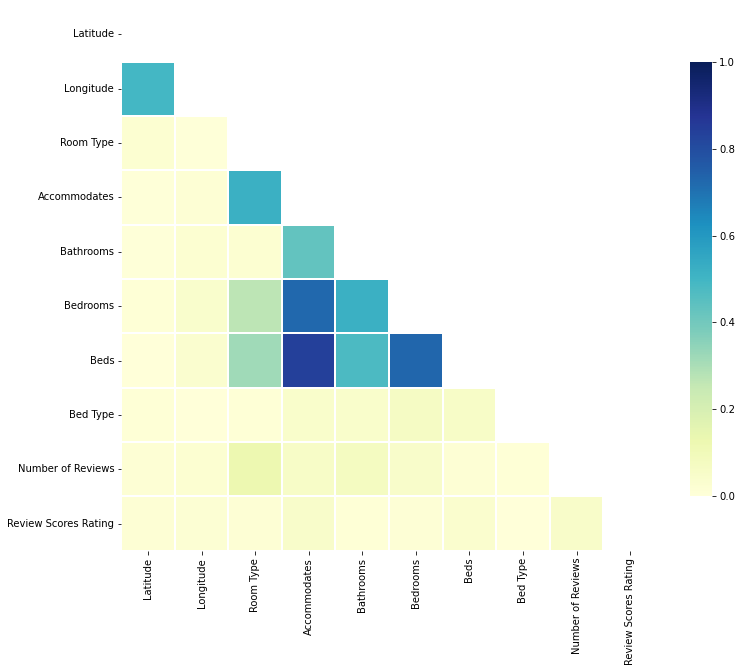

In [15]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(airbnb_data_clean.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

<div class="alert alert-success">
    <center>
<b> Aquí se me ocurre que podemos eliminar la variable "beds", ya que tiene alta correlación con "accommodates" (n° de personas) y "bedrooms" (con "bathrooms" en menor medida). Si hay alta correlación entre variables podemos caer en overfitting y nuestro modelo no será muy generalizable. También hay cierta correlación entre estas últimas 2 con accommodates, pero por ahora las dejaré.</b> 
    </center>
</div>

In [16]:
airbnb_data_clean = airbnb_data_clean.drop(["Beds"], axis=1)
airbnb_data_clean.head()

,Latitude,Longitude,Room Type,Accommodates,Bathrooms,Bedrooms,Bed Type,Price,Number of Reviews,Review Scores Rating
0,40.407732,-3.684819,95.101560,4,1.0,1.0,74.080606,60.0,12,95.0
1,40.415802,-3.705340,95.101560,4,1.0,1.0,74.080606,50.0,20,91.0
2,40.389048,-3.740374,31.320988,1,1.5,1.0,74.080606,10.0,0,NaN
3,40.412814,-3.703052,40.894831,2,3.0,1.0,74.080606,30.0,0,NaN
4,40.438631,-3.713716,40.894831,2,1.0,1.0,74.080606,32.0,97,92.0


<div class="alert alert-success">
    <center>
<b> Imputo y selecciono/divido variables al mismo tiempo (me dí cuenta de que el  imputer devuelve un array de Numpy)</b> 
    </center>
</div>

In [17]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(weights="distance")


data=imputer.fit_transform(airbnb_data_clean) #ESTO ES EL TRAINING SET

X=data[:,[0, 1,2,3,4,5,6,8,9]] #Resto de columnas
y=data[:,[7]] #Columna PRICE


<div class="alert alert-success">
    <center>
<b> Me he dado cuenta de que, por el simple hecho de que la columna "prices" no sea la primera como en el ejemplo de la clase, se me complicó la vida. Todo es más complicado.</b> 
    </center>
</div>

In [18]:
airbnb_data_clean.columns

Index(['Latitude', 'Longitude', 'Room Type', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Bed Type', 'Price', 'Number of Reviews',
       'Review Scores Rating'],
      dtype='object')

<div class="alert alert-success">
    <center>
<b> Aquí por ejemplo no pude utilizar el atributo "COLUMNS" porque no sé cómo unir los índices (hacer algo así como <em>airbnb_data_clean.columns[1:5 & 7]</em>  )</b> 
    </center>
</div>


D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


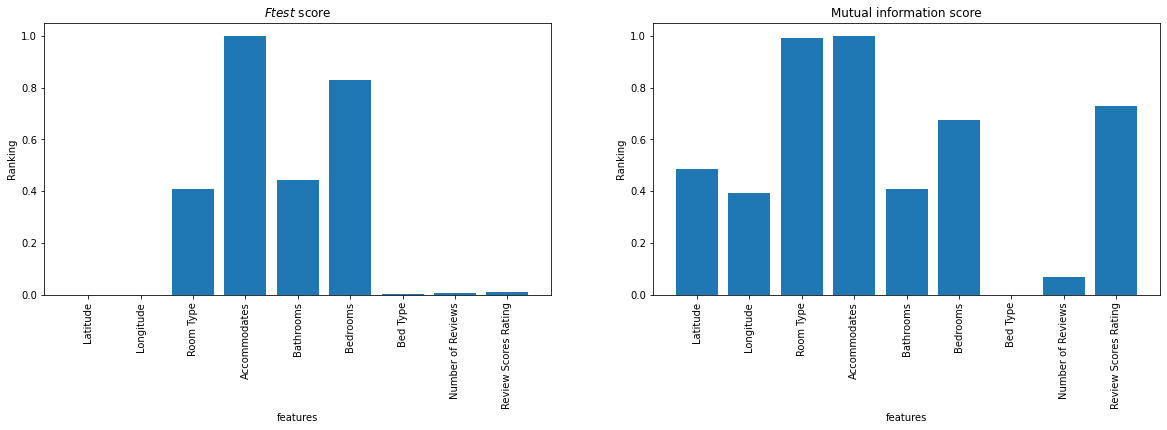

In [19]:
from sklearn.feature_selection import f_regression, mutual_info_regression


feature_names = ['Latitude', 'Longitude', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Bed Type',
                 'Number of Reviews', 'Review Scores Rating']


# do calculations
f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X.shape[1]),f_test,  align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$F test$ score')

plt.subplot(1,2,2)
plt.bar(range(X.shape[1]),mi, align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

<div class="alert alert-success">
    <center>
<b> Bueno, de esto extraigo que Room Type, accomodates y bedrooms (que de por sí tienen cierta correlación) son las 3 variables importantes (tanto en ftest como en mutual). Del Mutual saco que Review scores rating es bastante alta. Las únicas que no suman casi nada en ninguno de los tests son N° of reviews y bed type.</b> 
    </center>
</div>


<div class="alert alert-warning">
    <center>
<b> Joder, este práctico es un desorden total, pero lo voy atando con alambres. Aquí elimino las variables que no sirven y vuelvo a asignar el training set. Ahora que hice Lasso abajo, que en teoría ayuda a elegir variables, me pregunto si era necesario hacer todo esto del f_test y el mutual information... pero ya lo hice así que ahí quedará.</b> 
    </center>
</div>

In [20]:
airbnb_data_clean = airbnb_data_clean.drop(["Bed Type","Number of Reviews"], axis=1)

data=imputer.fit_transform(airbnb_data_clean) #ESTO ES EL TRAINING SET
airbnb_data_clean.columns


Index(['Latitude', 'Longitude', 'Room Type', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Price', 'Review Scores Rating'],
      dtype='object')

In [21]:
X=data[:,[0, 1,2,3,4,5,7]] #Resto de columnas
y=data[:,[6]] #Columna PRICE

<div class="alert alert-success">
    <center>
<b> Escalado del training set</b> 
    </center>
</div>


In [22]:
from sklearn import preprocessing

# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X)
XtrainScaled = scaler.transform(X)
XtrainScaled

array([[-0.01784705,  0.00656796,  0.80198379, ..., -0.42958464,
        -0.37982517,  0.39210253],
       [-0.01613026,  0.0051036 ,  0.80198379, ..., -0.42958464,
        -0.37982517, -0.07741135],
       [-0.02182161,  0.00260372, -1.59149234, ...,  0.32235324,
        -0.37982517,  0.04096579],
       ...,
       [-0.01603054,  0.00455043,  0.80198379, ..., -0.42958464,
        -0.37982517,  0.27472406],
       [-0.0166419 ,  0.00467975,  0.80198379, ..., -0.42958464,
        -0.37982517,  0.74423794],
       [-0.01289493,  0.00707099, -1.23221734, ..., -0.42958464,
        -0.37982517, -0.78168218]])

<div class="alert alert-success">
    <center>
<b> Me va gustando, con esto probaré un par de modelos y veré cómo viene la cosa</b> 
    </center>
</div>


![](https://scikit-learn.org/stable/_static/ml_map.png)

In [23]:
airbnb_data_clean.shape

(11824, 8)

<div class="alert alert-success">
    <center>
<b> Según nuestro amigo Scikit Learn, lo más factible es utilizar LASSO, Ridge o SVR con kernel lineal. Vamos a ver</b> 
    </center>
</div>


<div class="alert alert-success">
    <center>
<b> Para elegir el mejor alfa, hago cross-validation, por supuesto:</b> 
    </center>
</div>


best mean cross-validation score: -3342.550
best parameters: {'alpha': 0.006189658188912597}


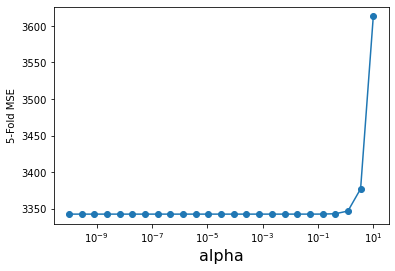

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Dejaré esta nota por si se me olvida xD

# Por convención, GridSearchCV siempre intenta MAXIMIZAR los resultados, por lo que
# funciones de coste, como MSE, tienen que ir negadas: https://github.com/scikit-learn/scikit-learn/issues/2439
# Por eso aparece neg_mean_squared_error y por eso hay luego un -1 multiplicando

#Recordar que X es mi x_train, y es my y_train

alpha_vector = np.logspace(-10,1,25)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5)
grid.fit(X, y)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
# plt.ylim((0, 1))
plt.show()

<div class="alert alert-success">
    <center>
<b> Bueno, aquí aplico todas las transformaciones del training al test set. Como dicen ustedes, qué coñazo.</b> 
    </center>
</div>


In [25]:
test = airbnb_data_test.drop(["ID","Listing Url", "Scrape ID","Name","Summary","Space","Description","Experiences Offered",
                                      "Neighborhood Overview","Notes","Transit","Access","Interaction","House Rules",
                                      "Thumbnail Url","Medium Url","Picture Url","XL Picture Url","Host ID","Host URL",
                                      "Host Name", "Host Since",
"Host Location","Bed Type","Number of Reviews","Beds",
"Host About",
"Host Response Time",
"Host Response Rate",
"Host Acceptance Rate",
"Host Thumbnail Url",
"Host Picture Url",
"Host Neighbourhood",
"Host Listings Count",
"Host Total Listings Count",
"Host Verifications",
"Street",
"Neighbourhood Cleansed",
"Neighbourhood Group Cleansed",
"Market",
"Smart Location",
"Country Code",
"Weekly Price",
"Monthly Price",
"Security Deposit",
"Cleaning Fee",
"Guests Included",
"Extra People",
"Minimum Nights",
"Maximum Nights",
"Calendar Updated",
"Has Availability",
"Availability 30",
"Availability 60",
"Availability 90",
"Availability 365",
"Calendar last Scraped",
"First Review",
"Last Review",
"Review Scores Accuracy",
"Review Scores Cleanliness",
"Review Scores Checkin",
"Review Scores Communication",
"Review Scores Location",
"Review Scores Value",
"License",
"Jurisdiction Names",
"Cancellation Policy",
"Calculated host listings count",
"Reviews per Month",
"Geolocation",
"Features",
"Amenities",
"Last Scraped",
"State",
"Zipcode", "Square Feet", "City", "Country", "Neighbourhood", "Property Type"], axis=1)

categorical = ['Room Type']

mean_map = {}
for c in categorical:
    mean = test.groupby(c)['Price'].mean()
    test[c] = test[c].map(mean)    
    mean_map[c] = mean

imputer = KNNImputer(weights="distance")


data_test=imputer.fit_transform(test) #ESTO ES EL testing SET



In [26]:
test.columns

Index(['Latitude', 'Longitude', 'Room Type', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Price', 'Review Scores Rating'],
      dtype='object')

In [27]:
X_test=data_test[:,[0, 1,2,3,4,5,7]] #Resto de columnas
y_test=data_test[:,[6]] #Columna PRICE
XtestScaled = scaler.transform(X_test) #Escalado del testing set (con el escalador calculado del training)


<div class="alert alert-success">
    <center>
<b> X = Training X<br><br>y = training y<br><br>X_test = testing X<br><br>y_test = testing y<br><br>XtrainScaled = X train escalado<br><br>XtestScaled = X test escalado</b> 
    </center>
</div>


In [28]:
# alpha_optimo = grid.best_params_['alpha'] 
# lasso = Lasso(alpha = alpha_optimo).fit(X,y)

# # predicción
# y_hat = lasso.predict(X_test)
# w = lasso.coef_
# norm_w2 = np.dot(w,w.T)

# # error
# error_test = np.mean(np.power(y - y_hat,2)) 


In [29]:
features = test.columns.drop(['Price']) #Utilizo TEST porque es la que tengo más cerca y no me quiero complicar, 
                                        #pero esto sirve solo para extraer los nombres de las features
features

Index(['Latitude', 'Longitude', 'Room Type', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Review Scores Rating'],
      dtype='object')

In [30]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha'] #Obtenido más arriba
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)

mseTrainModelLasso = mean_squared_error(y,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

r2lassotrain = lasso.score(XtrainScaled,y)
r2lasssotest = lasso.score(XtestScaled,y_test)


print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

print('R^2 Modelo Lasso (Train): %0.5g' % r2lassotrain)
print('R^2 Modelo Lasso (Test) : %0.5g' % r2lasssotest)

w = lasso.coef_
for f,wi in zip(features,w):
    print(f,wi)

MSE Modelo Lasso (train): 3.34e+03
MSE Modelo Lasso (test) : 3.42e+03
RMSE Modelo Lasso (train): 57.8
RMSE Modelo Lasso (test) : 58.5
R^2 Modelo Lasso (Train): 0.35855
R^2 Modelo Lasso (Test) : 0.37626
Latitude -1.4535885052570123
Longitude -1.4837279735931566
Room Type 15.316365067941963
Accommodates 14.613132782789487
Bathrooms 13.717925411536081
Bedrooms 13.82203178706737
Review Scores Rating 5.32260503698715


<div class="alert alert-success">
    <center>
<b> Intentaré con decision tree<br></b> 
    </center>
</div>


best mean cross-validation score: 0.440
best parameters: {'max_depth': 8}


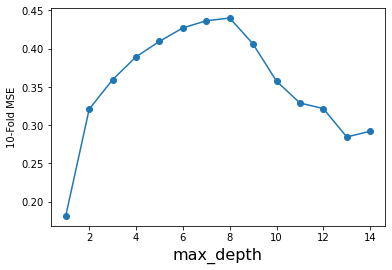

In [31]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV
from sklearn import tree


maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 10)
grid.fit(XtrainScaled, y)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [35]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(XtrainScaled,y)

print("Train: ",treeModel.score(XtrainScaled,y))
print("Test: ",treeModel.score(XtestScaled,y_test))

Train:  0.6270469994304911
Test:  0.42157293383468997


<div class="alert alert-success">
    <center>
<b> Parece que este modelo tiene mejor score, funciona un poco mejor.<br></b> 
    </center>
</div>


# Pequeña conclusión

De estos dos modelos probados, el decision tree parece funcionar mejor, pero sinceramente no estoy del todo seguro de qué tan buenas son esos scores (el R2 de lasso sí que parece bajo). Puede que haya hecho mala selección de features o algo así. Espero con ansias la corrección para aprender.

Bueno, la práctica es un poco desordenada. He hecho todo lo posible por comentar mi proceso cognitivo para que sea más fácil corregir y entender qué pasa por mi cabeza en cada punto. Esto no pasa una inspección de clean code ni a palos. Pero creo que he aprendido bastante haciéndola. Me ha pasado de que me dí cuenta de cosas tarde y he tenido que volver atrás a cambiarlas (por ejemplo, no había escalado los Xtest y Xtrain en un principio). Lo que también me di cuenta tarde es que no convertí variables categóricas antes de hacer algunas cosas.

La práctica en sí no creo que sea excesivamente compleja... solo que dimos muchos contenidos en 6 clases y por ahí se complica un poco ordenar los pensamientos y las tareas. Creo que podría mejorarla muchísimo, pero aún así estoy bastante conforme con mi trabajo. Sinceramente me he quedado sin tiempo, faltan 30 minutos para la hora límite y bueno, reconozco que últimamente tengo un pequeño problema de procrastinación. 
